Model Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

      Danger       1.00      1.00      1.00        10
        Safe       1.00      1.00      1.00        63
     Warning       1.00      1.00      1.00        47

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



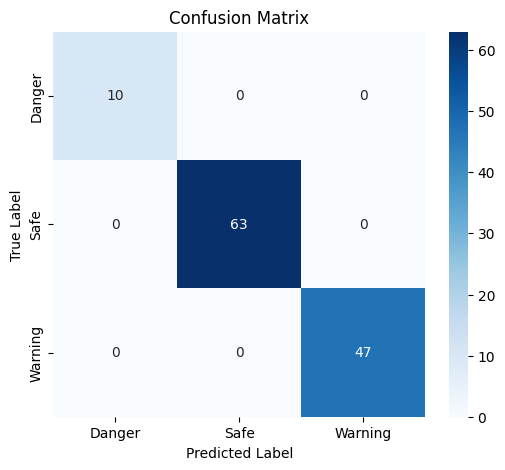


✅ Stacked model, label encoder, and scaler saved as .joblib files!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

# Load dataset
df = pd.read_csv('dataset.csv')

# Features (Temperature, Humidity, GasConcentrationPPM)
X = df[['Temperature', 'Humidity', 'GasConcentrationPPM']]

# Target (GasLevel)
y = df['GasLevel']

# Encode target labels (Safe, Warning, Danger)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize features (important for KNN and SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base models
base_models = [
    ('knn', KNeighborsClassifier(n_neighbors=3)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000)),
    ('svm', SVC(probability=True))  # Important: probability=True for stacking
]

# Define stacked model
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    cv=5
)

# Train the stacked model
stacked_model.fit(X_train_scaled, y_train)

# Predict
y_pred = stacked_model.predict(X_test_scaled)

# Decode predictions
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:\n", classification_report(y_test_decoded, y_pred_decoded, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test_decoded, y_pred_decoded)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Save model and encoder
joblib.dump(stacked_model, 'stacked_gas_level_classifier_model.joblib')
joblib.dump(label_encoder, 'gas_level_label_encoder.joblib')
joblib.dump(scaler, 'scaler.joblib')

print("\n✅ Stacked model, label encoder, and scaler saved as .joblib files!")
